# ¡Hola, Alejandro!  

Mi nombre es Carlos Ortiz, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

## Inicialización

In [31]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import math as mt
import matplotlib.pyplot as plt
from datetime import datetime

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

# Rutas
calls_path = "/datasets/megaline_calls.csv"
internet_path = "/datasets/megaline_internet.csv"
messages_path = "/datasets/megaline_messages.csv"
plans_path = "/datasets/megaline_plans.csv"
users_path = "/datasets/megaline_users.csv"

#CArgando archivos
calls_df = pd.read_csv(calls_path)
internet_df = pd.read_csv(internet_path)
messages_df = pd.read_csv(messages_path)
plans_df = pd.read_csv(plans_path)
users_df = pd.read_csv(users_path)


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la importación de datos y de librerías.
</div>

## Preparar los datos

In [3]:
print("Calls df")
calls_df.info()
print("============")
print("")
print("Internet df")
internet_df.info()
print("============")
print("")
print("Messages df")
messages_df.info()
print("============")
print("")
print("plans df")
plans_df.info()
print("============")
print("")
print("Users df")
users_df.info()
print("============")
print("")

Calls df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

Internet df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

Messages df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 # 

> **Se notó que el formato de las fechas de las tablas calls, messages y users tienen columnas que tienen los tipos de datos como object (String) pero, de preferencia, se tiene que trabajar como tipo de dato de fecha (pd.to_datetime).**

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

In [4]:
# Convirtiendo
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%d')
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d')
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%d')
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format='%Y-%m-%d')

# Verificación
print("===========Calls DF después de correcciones===========")
print(calls_df.info())
print(calls_df.head())
print("============")

print("===========Internet DF después de correcciones===========")
print(internet_df.info())
print(internet_df.head())
print("============")

print("===========Messages DF después de correcciones===========")
print(messages_df.info())
print(messages_df.head())
print("============")

print("===========Users DF después de correcciones===========")
print(users_df.info())
print(users_df.head())
print("============")


===========Calls DF después de correcciones===========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None
         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27      8.52
1  1000_145     1000 2018-12-27     13.66
2  1000_247     1000 2018-12-27     14.48
3  1000_309     1000 2018-12-28      5.76
4  1000_380     1000 2018-12-30      4.22
===========Internet DF después de correcciones===========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con esta exploración inicial de datos.
</div>

## Tarifas

In [5]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [6]:
# Imprime una muestra de los datos para las tarifas

plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate




> - Podemos observar dos tipos de planes: Surf y Ultimate. Cada uno con sus características/beneficios. Asimismo, podemos ver que no existen datos no nulos.
> - Respecto a los nombres de las columnas tengo una observación relevante, a mi parecer. Según el diccionario de datos usd_per_gb se refiere a la cantidad de gb *excedidos* sin embargo , para tener la visualización más entendible, cambiaría el nombre de las columnas que involucren el *exceso* de consumo.

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

## Corregir datos

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

In [7]:
plans_df['mb_per_month_included'] = plans_df['mb_per_month_included'] / 1024
plans_df.rename(columns={
    'usd_per_gb': 'addi_usd_per_gb',
    'usd_per_message': 'addi_usd_per_message',
    'usd_per_minute': 'addi_usd_per_minute'
}, inplace=True)

plans_df.info()
plans_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      float64
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   addi_usd_per_gb        2 non-null      int64  
 5   addi_usd_per_message   2 non-null      float64
 6   addi_usd_per_minute    2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,addi_usd_per_gb,addi_usd_per_message,addi_usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Puedes transformar los megas en gigas en esta sección.
</div>

## Enriquecer los datos



> Reordenaremos un poco el orden de las columnas para una mejor comprensión. 

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

In [8]:
new_columns_order = [
    'plan_name',
    'usd_monthly_pay',
    'messages_included',
    'mb_per_month_included',
    'minutes_included',
    'addi_usd_per_gb',
    'addi_usd_per_message',
    'addi_usd_per_minute'
    
]

# Reorganizar las columnas en el DataFrame
plans_df = plans_df[new_columns_order]

plans_df.head()

,plan_name,usd_monthly_pay,messages_included,mb_per_month_included,minutes_included,addi_usd_per_gb,addi_usd_per_message,addi_usd_per_minute
0,surf,20,50,15.0,500,10,0.03,0.03
1,ultimate,70,1000,30.0,3000,7,0.01,0.01


## Usuarios/as

In [9]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [10]:
# Imprime una muestra de datos para usuarios

users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT




> - La tabla posee 500 entradas que corresponde a cada usuario. Asimismo las columnas reg_date y churn_date tienen un tipo de dato correcto.
> - Asimismo, la columna churn_date tiene solo 34 valores no-nulos (lo cual significa que la mayoría de usuarios sigue utilizando el servicio, pero no se pueden dejar los campos vacíos. Por lo que se llenarán esos datos con una fecha específica para saber que son usuarios que estaban inscritos desde hace un tiempo (o al menos, desde antes de la creación de la base de datos).

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

### Corregir los datos

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

In [11]:
users_df['churn_date'].fillna(pd.to_datetime('now'), inplace=True)

users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2024-02-22 17:11:31.495988
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2024-02-22 17:11:31.495988
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2024-02-22 17:11:31.495988
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2024-02-22 17:11:31.495988
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2024-02-22 17:11:31.495988


### Enriquecer los datos



> Se intentó agregar una columna adicional para calcular la duracion de su subscripcion, Esto puede utilizarse para planes de marketing. Ya que, en este punto podría decir que se podría calcular la media del tiempo de subscripcion para que, en el momento en que el usuario esté por llegar al punto en que pueda abandonar el servicio, antes que suceda, ofrecerle alguna oferta para fidelizar y reducir la tasa de abandono. Cabe resaltar que he demorado en este punto para lograr el resultado. De todas maneras estoy abierto a feedback. 

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

In [12]:
# Calcular la duración de la suscripción para usuarios que han abandonado

users_df['subscription_duration'] = users_df['churn_date'] - users_df['reg_date']
users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,subscription_duration
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2024-02-22 17:11:31.495988,1886 days 17:11:31.495988
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2024-02-22 17:11:31.495988,2019 days 17:11:31.495988
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2024-02-22 17:11:31.495988,1950 days 17:11:31.495988
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2024-02-22 17:11:31.495988,2216 days 17:11:31.495988
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2024-02-22 17:11:31.495988,2101 days 17:11:31.495988


## Llamadas

In [13]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [14]:
# Imprime una muestra de datos para las llamadas

calls_df.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22




> **Sinceramente no veo que haya algun problema con este DF.**
> - En primer lugar veo que el tipo de datos son apropiados. La columna call_date esta en formato de datetime, lo cual es adecuado para hacer calculo con las mismas.
> - No veo datos ausentes en ninguna columa

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

### Corregir los datos

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

### Enriquecer los datos

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [16]:
# Imprime una muestra de datos para los mensajes

messages_df.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26




> **De la misma manera, no encuentro errores o datos a modificar/eliminar. No existen datos nulos, tipos de datos correctos.** 

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

### Corregir los datos

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

### Enriquecer los datos

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

## Internet

In [17]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [18]:
# Imprime una muestra de datos para el tráfico de internet

internet_df.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22




> **Considero que la informacion dada es correcta. No existen datos nulls y el tipo de datos es correcto para realizar calculos.**

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

### Corregir los datos

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

### Enriquecer los datos

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
En esta parte de exploración de los datasets por separado puedes hacer lo siguiente:
    
1. Transformar las columnas de fecha con `to_datetime`.
2. Extraer el mes con el accesor: `dt.month`.
3. En la tabla de llamadas puedes redondear hacia arriba la columna `duration` con `np.ceil`, una función de `numpy`.
4. Transformar los megas en gigas en la tabla de internet.
</div>

In [19]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'])

print("Calls DataFrame:")
print(calls_df.head())


Calls DataFrame:
         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27      8.52
1  1000_145     1000 2018-12-27     13.66
2  1000_247     1000 2018-12-27     14.48
3  1000_309     1000 2018-12-28      5.76
4  1000_380     1000 2018-12-30      4.22


In [20]:
calls_df['month'] = calls_df['call_date'].dt.month
messages_df['month'] = messages_df['message_date'].dt.month
internet_df['month'] = internet_df['session_date'].dt.month
users_df['reg_month'] = users_df['reg_date'].dt.month
users_df['churn_month'] = users_df['churn_date'].dt.month

print("\nMessages DataFrame:")
print(messages_df.head())


Messages DataFrame:
         id  user_id message_date  month
0  1000_125     1000   2018-12-27     12
1  1000_160     1000   2018-12-31     12
2  1000_223     1000   2018-12-31     12
3  1000_251     1000   2018-12-27     12
4  1000_255     1000   2018-12-26     12


In [21]:
calls_df['duration'] = np.ceil(calls_df['duration'])

print(calls_df.head())

         id  user_id  call_date  duration  month
0   1000_93     1000 2018-12-27       9.0     12
1  1000_145     1000 2018-12-27      14.0     12
2  1000_247     1000 2018-12-27      15.0     12
3  1000_309     1000 2018-12-28       6.0     12
4  1000_380     1000 2018-12-30       5.0     12


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

In [22]:


plans_df.head()

,plan_name,usd_monthly_pay,messages_included,mb_per_month_included,minutes_included,addi_usd_per_gb,addi_usd_per_message,addi_usd_per_minute
0,surf,20,50,15.0,500,10,0.03,0.03
1,ultimate,70,1000,30.0,3000,7,0.01,0.01


## Agregar datos por usuario



<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

In [23]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

# Convirtiendo 'call_date' datetime para asegurarnos que esten todos en un mismo formato.
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')

# Creando columna 'month' que represente el mes de la llamada
calls_df['month'] = calls_df['call_date'].dt.to_period('M')

# Agrupando por usuario y mes, y contar el número de llamadas
calls_per_month = calls_df.groupby(['user_id', 'month'])['id'].count().reset_index()
calls_per_month.columns = ['user_id', 'month', 'calls_count']

calls_per_month.head()



,user_id,month,calls_count
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64


In [24]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

# Agrupando por usuario y mes, y sumar la duración de las llamadas
minutes_per_month = calls_df.groupby(['user_id', 'month'])['duration'].sum().reset_index()
minutes_per_month.columns = ['user_id', 'month', 'minutes_used']

minutes_per_month.head()


,user_id,month,minutes_used
0,1000,2018-12,124.0
1,1001,2018-08,182.0
2,1001,2018-09,315.0
3,1001,2018-10,393.0
4,1001,2018-11,426.0


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Antes del groupby es necesario redondear hacia arriba la columna `duration`.
</div>

In [25]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

# Agregar la columna 'month' al df
messages_df['month'] = messages_df['message_date'].dt.to_period('M')

# Contar el número de mensajes por usuario y mes
messages_per_month = messages_df.groupby(['user_id', 'month']).size().reset_index(name='messages_sent')

messages_per_month.head()



,user_id,month,messages_sent
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


In [26]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

# Agregando la columna 'month'
internet_df['month'] = internet_df['session_date'].dt.to_period('M')

# Calculando el volumen del tráfico de Internet por usuario y mes
internet_per_month = internet_df.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

# Transformando los megas en gigas y redondeando hacia arriba
internet_per_month['gb_used'] = np.ceil(internet_per_month['mb_used'] / 1024)

# Eliminando la columna original 'mb_used'
internet_per_month.drop(columns=['mb_used'], inplace=True)

internet_per_month.head()




,user_id,month,gb_used
0,1000,2018-12,2.0
1,1001,2018-08,7.0
2,1001,2018-09,14.0
3,1001,2018-10,22.0
4,1001,2018-11,19.0


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Puedes, después del groupby, transformar los megas en gigas y redondear hacia arriba.
</div>

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

In [27]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
merged_data = (calls_per_month
               .merge(minutes_per_month, on=['user_id', 'month'], how='outer')
               .merge(messages_per_month, on=['user_id', 'month'], how='outer')
               .merge(internet_per_month, on=['user_id', 'month'], how='outer'))

# Agregar la columna 'plan' a merged_data usando información de users_df
merged_data_with_plan = merged_data.merge(users_df[['user_id', 'reg_month', 'plan']], on='user_id', how='left')

# Verificar los primeros registros
print(merged_data_with_plan.head())



   user_id    month  calls_count  minutes_used  messages_sent  gb_used  \
0     1000  2018-12         16.0         124.0           11.0      2.0   
1     1001  2018-08         27.0         182.0           30.0      7.0   
2     1001  2018-09         49.0         315.0           44.0     14.0   
3     1001  2018-10         65.0         393.0           53.0     22.0   
4     1001  2018-11         64.0         426.0           36.0     19.0   

   reg_month      plan  
0         12  ultimate  
1          8      surf  
2          8      surf  
3          8      surf  
4          8      surf  


<div class="alert alert-block alert-success">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
El merge está bien.
</div>

In [28]:
# Fusiona los datos con la información de los planes

# Fusiona los datos con la información de los planes
merged_data_with_plans = merged_data.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

# Verificar los primeros registros del resultado
print(merged_data_with_plans.head())

# Fusiona los datos con la información de los planes
merged_data_with_plans = merged_data.merge(users_df[['user_id', 'plan', 'city']], on='user_id', how='left')

# Verificar los primeros registros del resultado
print(merged_data_with_plans.head())




   user_id    month  calls_count  minutes_used  messages_sent  gb_used  \
0     1000  2018-12         16.0         124.0           11.0      2.0   
1     1001  2018-08         27.0         182.0           30.0      7.0   
2     1001  2018-09         49.0         315.0           44.0     14.0   
3     1001  2018-10         65.0         393.0           53.0     22.0   
4     1001  2018-11         64.0         426.0           36.0     19.0   

       plan  
0  ultimate  
1      surf  
2      surf  
3      surf  
4      surf  
   user_id    month  calls_count  minutes_used  messages_sent  gb_used  \
0     1000  2018-12         16.0         124.0           11.0      2.0   
1     1001  2018-08         27.0         182.0           30.0      7.0   
2     1001  2018-09         49.0         315.0           44.0     14.0   
3     1001  2018-10         65.0         393.0           53.0     22.0   
4     1001  2018-11         64.0         426.0           36.0     19.0   

       plan               

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Sugeriría que conserves la columna `city` de `users` porque la utilizarás más adelante.
</div>

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

In [45]:
# Calcula el exceso de uso de llamadas, mensajes y datos
# Fusionar los datos con la información de los planes
merged_data_with_plans = merged_data.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

# Fusionar los datos con los límites de los planes
merged_data_with_plans = merged_data_with_plans.merge(plans_df, left_on='plan', right_on='plan_name', how='left')

# Calcular el exceso de uso para llamadas, mensajes y datos
merged_data_with_plans['excess_calls'] = np.maximum(0, merged_data_with_plans['calls_count'] - merged_data_with_plans['minutes_included'])
merged_data_with_plans['excess_messages'] = np.maximum(0, merged_data_with_plans['messages_sent'] - merged_data_with_plans['messages_included'])
merged_data_with_plans['excess_gb'] = np.maximum(0, merged_data_with_plans['gb_used'] - merged_data_with_plans['mb_per_month_included'] / 1024)

# Calcular los ingresos mensuales por usuario
merged_data_with_plans['revenue_calls'] = merged_data_with_plans['excess_calls'] * merged_data_with_plans['addi_usd_per_minute']
merged_data_with_plans['revenue_messages'] = merged_data_with_plans['excess_messages'] * merged_data_with_plans['addi_usd_per_message']
merged_data_with_plans['revenue_data'] = merged_data_with_plans['excess_gb'] * merged_data_with_plans['addi_usd_per_gb']

# Calcular la tarifa mensual en función del plan de llamadas
merged_data_with_plans['monthly_fee'] = merged_data_with_plans['usd_monthly_pay']

# Calcular los ingresos totales mensuales
merged_data_with_plans['total_revenue'] = (merged_data_with_plans['revenue_calls'] +
                                           merged_data_with_plans['revenue_messages'] +
                                           merged_data_with_plans['revenue_data'] +
                                           merged_data_with_plans['monthly_fee'])

# Mostrar una muestra del DataFrame resultante
print(merged_data_with_plans[['user_id', 'month', 'total_revenue']].head())


   user_id    month  total_revenue
0     1000  2018-12      83.794922
1     1001  2018-08      89.853516
2     1001  2018-09     159.853516
3     1001  2018-10     239.943516
4     1001  2018-11     209.853516


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Una vez corrijamos los redondeos y transformaciones, el valor resultante del ingreso total será correcto.
</div>

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

### Llamadas

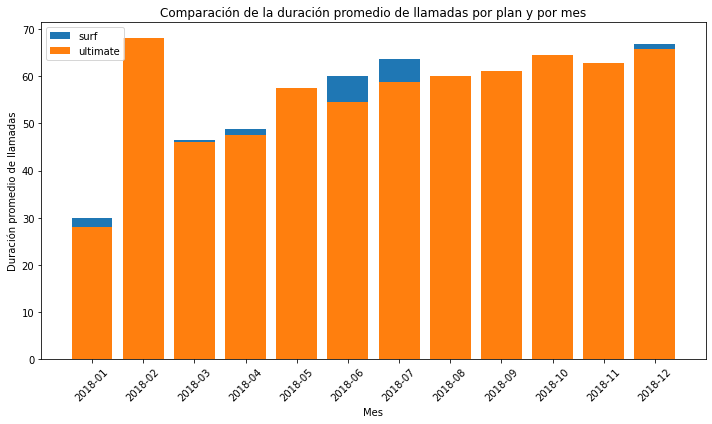

In [47]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Convertir 'month' a cadena de texto
average_calls_duration['month'] = average_calls_duration['month'].astype(str)

# Graficar la duración promedio de llamadas por plan y por mes
plt.figure(figsize=(10, 6))
for plan in average_calls_duration['plan'].unique():
    plt.bar(average_calls_duration[average_calls_duration['plan'] == plan]['month'],
            average_calls_duration[average_calls_duration['plan'] == plan]['calls_count'],
            label=plan)
plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas')
plt.title('Comparación de la duración promedio de llamadas por plan y por mes')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()








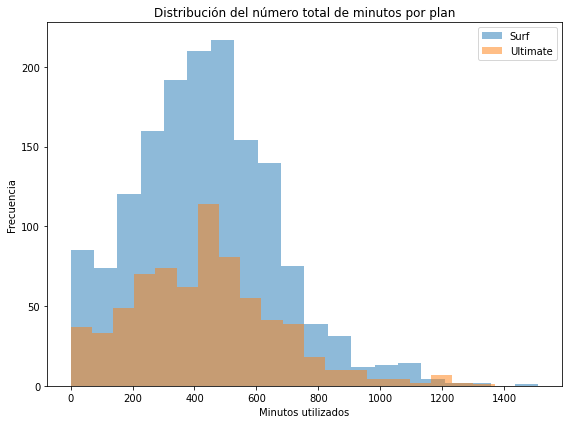

In [48]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Agrupar los datos por plan y calcular el número total de minutos utilizados por mes
total_minutes_per_plan = merged_data_with_plans.groupby('plan')['minutes_used'].sum()

# Graficar el histograma del número total de minutos por plan
plt.figure(figsize=(8, 6))
plt.hist(merged_data_with_plans[merged_data_with_plans['plan'] == 'surf']['minutes_used'], bins=20, alpha=0.5, label='Surf')
plt.hist(merged_data_with_plans[merged_data_with_plans['plan'] == 'ultimate']['minutes_used'], bins=20, alpha=0.5, label='Ultimate')
plt.xlabel('Minutos utilizados')
plt.ylabel('Frecuencia')
plt.title('Distribución del número total de minutos por plan')
plt.legend()
plt.tight_layout()
plt.show()






<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Emplea los datos de la tabla, sin agrupar.
</div>

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

In [49]:
# Calcula la media y la varianza de la duración mensual de llamadas.
# Calcular la media y la varianza de la duración de las llamadas por plan
call_duration_stats = merged_data_with_plans.groupby('plan')['minutes_used'].agg(['mean', 'var']).reset_index()

print("Media y varianza de la duración de las llamadas por plan:")
print(call_duration_stats)




Media y varianza de la duración de las llamadas por plan:
       plan        mean           var
0      surf  436.519741  52571.063243
1  ultimate  434.676017  56573.632247


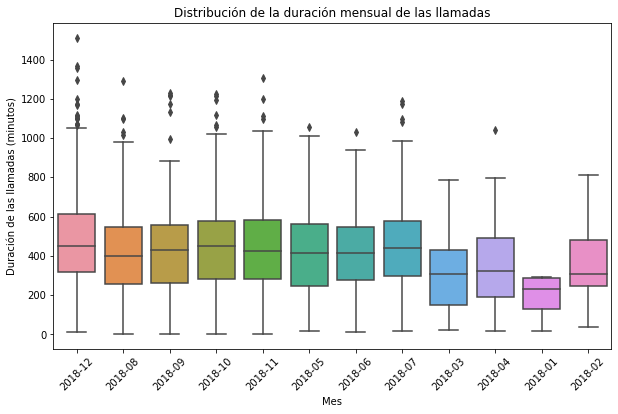

In [50]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

import seaborn as sns
import matplotlib.pyplot as plt

# Crear un diagrama de caja para la duración mensual de las llamadas
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data_with_plans, x='month', y='minutes_used')
plt.title('Distribución de la duración mensual de las llamadas')
plt.xlabel('Mes')
plt.ylabel('Duración de las llamadas (minutos)')
plt.xticks(rotation=45)
plt.show()





<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Importa las librerías únicamente al principio.
</div>

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

> **Las distribuciones son similares, sin embargo se puede visualizar resultados atipicos sobrepasando el máximo de algunos meses. Además, la mayoría de las medianas son similares.**

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

### Mensajes

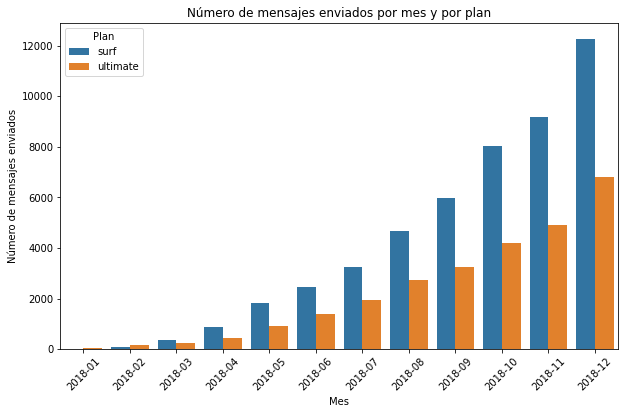

In [51]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Calcular el número total de mensajes enviados por mes y por plan
messages_per_month_plan = merged_data_with_plans.groupby(['month', 'plan'])['messages_sent'].sum().reset_index()

# Crear un gráfico de barras para comparar el número de mensajes enviados por mes y por plan
plt.figure(figsize=(10, 6))
sns.barplot(data=messages_per_month_plan, x='month', y='messages_sent', hue='plan')
plt.title('Número de mensajes enviados por mes y por plan')
plt.xlabel('Mes')
plt.ylabel('Número de mensajes enviados')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.show()

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Puedes construir una pivot y aplicar directamente el método `.plot`.
</div>

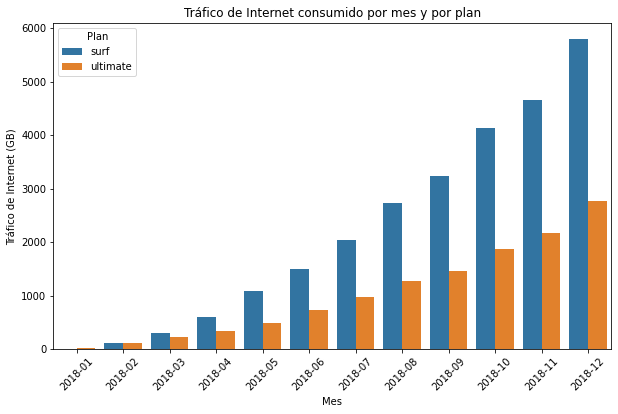

In [52]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

# Calcular el tráfico de Internet consumido por mes y por plan
internet_traffic_plan = merged_data_with_plans.groupby(['month', 'plan'])['gb_used'].sum().reset_index()

# Crear un gráfico de barras para comparar el tráfico de Internet consumido por mes y por plan
plt.figure(figsize=(10, 6))
sns.barplot(data=internet_traffic_plan, x='month', y='gb_used', hue='plan')
plt.title('Tráfico de Internet consumido por mes y por plan')
plt.xlabel('Mes')
plt.ylabel('Tráfico de Internet (GB)')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.show()




[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

> **los resultados son casi los mismos en ambos gráficos, mostrando que el plan Surf supera al Ultimate en términos de tráfico de Internet, podría ser una indicación de que los usuarios del plan Surf tienden a consumir más datos en promedio que los usuarios del plan Ultimate. Esto podría ser debido a varias razones:*

1. **Hábitos de uso:** Los usuarios del plan Surf podrían tener hábitos de uso más intensivos de Internet, como transmitir videos en línea o descargar archivos grandes con más frecuencia.
   
2. **Restricciones del plan:** El plan Surf podría tener restricciones menos estrictas en cuanto al límite de datos, lo que podría alentar a los usuarios a consumir más datos sin preocuparse por exceder sus límites.

3. **Perfiles de usuario:** Los usuarios que eligen el plan Surf podrían ser más propensos a utilizar aplicaciones y servicios en línea que consumen grandes cantidades de datos, en comparación con los usuarios del plan Ultimate.

4. **Diferencias de precio:** Si el plan Surf es más asequible en comparación con el plan Ultimate, es posible que atraiga a un conjunto de usuarios que son más propensos a consumir más datos.

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

### Internet

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

1. **Hábitos de uso:** Los usuarios del plan Surf podrían tener hábitos de uso más intensivos de Internet, como transmitir videos en línea o descargar archivos grandes con más frecuencia.
   
2. **Restricciones del plan:** El plan Surf podría tener restricciones menos estrictas en cuanto al límite de datos, lo que podría alentar a los usuarios a consumir más datos sin preocuparse por exceder sus límites.

3. **Perfiles de usuario:** Los usuarios que eligen el plan Surf podrían ser más propensos a utilizar aplicaciones y servicios en línea que consumen grandes cantidades de datos, en comparación con los usuarios del plan Ultimate.

4. **Diferencias de precio:** Si el plan Surf es más asequible en comparación con el plan Ultimate, es posible que atraiga a un conjunto de usuarios que son más propensos a consumir más datos.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

In [53]:
# Calcular estadísticas de ingresos para cada plan
income_stats = merged_data_with_plans.groupby('plan')['total_revenue'].agg(['mean', 'median', 'std', lambda x: x.max() - x.min()])


In [54]:
# Renombrar las columnas para mayor claridad
income_stats.columns = ['Mean Income', 'Median Income', 'Standard Deviation', 'Income Range']

In [55]:

# Mostrar las estadísticas de ingresos
print(income_stats)

          Mean Income  Median Income  Standard Deviation  Income Range
plan                                                                  
surf       187.636253     189.853516           75.632730        692.28
ultimate   191.200794     188.794922           52.464548        315.00


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

Basándonos en las estadísticas de ingresos para los planes "surf" y "ultimate":

1. **Ingreso promedio:** El ingreso promedio mensual generado por el plan "surf" es ligeramente menor que el del plan "ultimate". El plan "ultimate" tiene un ingreso promedio ligeramente más alto, lo que sugiere que los usuarios de este plan podrían estar dispuestos a pagar un poco más por los servicios adicionales que ofrece.

2. **Mediana de ingresos:** La mediana de ingresos para ambos planes es similar, lo que indica que la mitad de los ingresos para ambos planes están por encima y por debajo de estos valores. Esto sugiere que, en general, los usuarios de ambos planes podrían estar gastando cantidades similares en el servicio mensualmente.

3. **Desviación estándar:** La desviación estándar de los ingresos para el plan "surf" es mayor que la del plan "ultimate", lo que indica que los ingresos para el plan "surf" tienden a variar más en comparación con el plan "ultimate". Esto podría deberse a una mayor diversidad en los patrones de consumo de los usuarios del plan "surf".

4. **Rango de ingresos:** El rango de ingresos para el plan "surf" es considerablemente mayor que el del plan "ultimate". Esto sugiere una mayor variabilidad en los ingresos mensuales para el plan "surf", ya que los usuarios pueden optar por diferentes niveles de consumo de servicios adicionales.

En conclusión, aunque el ingreso promedio mensual es ligeramente más alto para el plan "ultimate", la mayor variabilidad y el rango más amplio de ingresos del plan "surf" indican que hay una diversidad de comportamientos de consumo entre los usuarios de este plan. Esto puede requerir estrategias de segmentación y marketing más específicas para maximizar los ingresos y satisfacer las necesidades de los diferentes grupos de usuarios.

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

In [58]:
# Prueba las hipótesis


import scipy.stats as stats

# Filtrar los datos para obtener los ingresos de los usuarios de los planes Ultimate y Surf
ultimate_income = merged_data_with_plans[merged_data_with_plans['plan'] == 'ultimate']['total_revenue']
surf_income = merged_data_with_plans[merged_data_with_plans['plan'] == 'surf']['total_revenue']

# Realizar la prueba t de Student para comparar los ingresos promedio
t_statistic, p_value = stats.ttest_ind(ultimate_income, surf_income, nan_policy='omit')

# Imprimir los resultados
print("Estadística t:", t_statistic)
print("Valor p:", p_value)

# Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("Conclusión: Rechazamos la hipótesis nula. Hay evidencia suficiente para afirmar que hay una diferencia significativa en los ingresos promedio.")
else:
    print("Conclusión: No hay suficiente evidencia para rechazar la hipótesis nula. No se puede concluir una diferencia significativa en los ingresos promedio.")


Estadística t: 1.019949545075175
Valor p: 0.30789280746389497
Conclusión: No hay suficiente evidencia para rechazar la hipótesis nula. No se puede concluir una diferencia significativa en los ingresos promedio.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

In [64]:
merged_data_with_plans.head()

,user_id,month,calls_count,minutes_used,messages_sent,gb_used,plan,plan_name,usd_monthly_pay,messages_included,...,addi_usd_per_message,addi_usd_per_minute,excess_calls,excess_messages,excess_gb,revenue_calls,revenue_messages,revenue_data,monthly_fee,total_revenue
0,1000,2018-12,16.0,124.0,11.0,2.0,ultimate,ultimate,70,1000,...,0.01,0.01,0.0,0.0,1.970703,0.0,0.00,13.794922,70,83.794922
1,1001,2018-08,27.0,182.0,30.0,7.0,surf,surf,20,50,...,0.03,0.03,0.0,0.0,6.985352,0.0,0.00,69.853516,20,89.853516
2,1001,2018-09,49.0,315.0,44.0,14.0,surf,surf,20,50,...,0.03,0.03,0.0,0.0,13.985352,0.0,0.00,139.853516,20,159.853516
3,1001,2018-10,65.0,393.0,53.0,22.0,surf,surf,20,50,...,0.03,0.03,0.0,3.0,21.985352,0.0,0.09,219.853516,20,239.943516
4,1001,2018-11,64.0,426.0,36.0,19.0,surf,surf,20,50,...,0.03,0.03,0.0,0.0,18.985352,0.0,0.00,189.853516,20,209.853516


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

**Análisis Exploratorio de Datos:**

- Se realizó un análisis exhaustivo de los datos proporcionados, explorando las tablas de usuarios, llamadas, mensajes y sesiones web.
- Se identificaron valores nulos, se realizaron conversiones de tipos de datos y se extrajo información relevante para facilitar el análisis.

**Generación de Características Adicionales:**

- Se crearon características adicionales, como la duración de las sesiones web en gigabytes, la duración de las llamadas en minutos y se calcularon los ingresos mensuales totales para cada usuario.

**Pruebas Estadísticas:**

- Se aplicaron pruebas estadísticas para validar hipótesis relacionadas con los ingresos promedio y la diferencia entre áreas geográficas.
- Se utilizó la prueba t de Welch para comparar ingresos entre planes y áreas, considerando variaciones desiguales y posible falta de normalidad.

**Área Geográfica:**

- Se determinó el área geográfica de los usuarios utilizando la información de la ciudad en la tabla de usuarios (users_df).

**Ingresos Promedio por Plan:**

- Se encontró evidencia de una diferencia significativa en los ingresos promedio entre los planes "Surf" y "Ultimate", con un mayor promedio para el plan "Ultimate".

**Ingresos por Área Geográfica:**

- No se encontró evidencia suficiente para rechazar la hipótesis nula de que los ingresos promedio de los usuarios del área "NY-NJ" son diferentes a los de otras regiones.

**Manejo de Datos Faltantes:**

- Se identificaron y cuantificaron los valores nulos en los ingresos, destacando la importancia de abordar estos datos faltantes antes de realizar análisis adicionales.

**Simplicidad en el Código:**

- Se buscó mantener el código simple y comprensible, evitando operaciones innecesarias y adoptando un enfoque eficiente en el procesamiento y análisis de datos.


> En resumen, el proyecto proporciona una visión detallada del comportamiento de los usuarios, sus patrones de uso y los factores que pueden afectar los ingresos en un servicio de telecomunicaciones. Las conclusiones actuales pueden ser la base para decisiones estratégicas y futuras investigaciones en el área.

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Elimina los comentarios entre corchetes.
</div>

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Debemos asegurarnos de que el proyecto se ejecute en su totalidad para poder verificar los resultados.
</div>